In [4]:
using QuantEcon: LAE, lae_est
using Distributions
using PyPlot

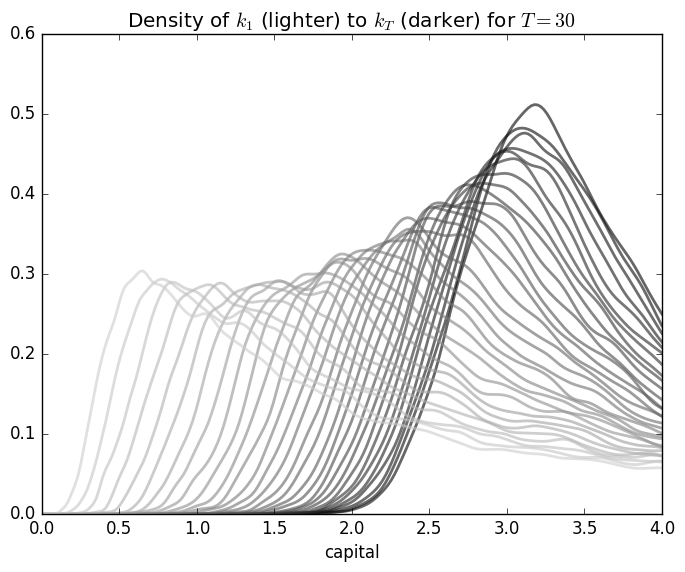

In [27]:

s = 0.2 # Savings Rate
δ = 0.1 # Capital Depreciation Rate
a_σ = 0.4  # A = exp(B) where B ~ N(0, a_sigma)
α = 0.4  # We set f(k) = k**alpha
ψ_0 = Levy(0,1.5) # Initial Continuous State distribution
ϕ = LogNormal(0.0, a_σ)


n = 10000  # Number of observations at each date t
T = 30  # Compute density of k_t at 1,...,T+1

# Generate matrix s.t. t-th column is n observations of k_t
k = Array(Float64, n, T)
A = rand!(ϕ, Array(Float64, n, T))

# Draw first column from initial distribution
k[:, 1] = rand(ψ_0, n)   # divide by 2 to match scale=0.5 in py version
for t=1:T-1
    k[:, t+1] = s*A[:, t] .* k[:, t].^α + (1-δ) .* k[:, t]
end


function p(x, y)
    #=
    Stochastic kernel for the growth model with Cobb-Douglas production.
    Both x and y must be strictly positive.
    =#
    d = s * x.^α

    # scipy silently evaluates the pdf of the lognormal dist at a negative
    # value as zero. It should be undefined and Julia recognizes this.
    pdf_arg = clamp((y .- (1-δ) .* x) ./ d, eps(), Inf)
    return pdf(ϕ, pdf_arg) ./ d
end




# Generate T instances of LAE using this data, one for each date t
laes = [LAE(p, k[:, t]) for t=T:-1:1]

# Plot
fig, ax = subplots()
ygrid = linspace(0.01, 4.0, 200)
greys = [string(g) for g in linspace(0.0, 0.8, T)]
for (psi, g) in zip(laes, greys)
    ax[:plot](ygrid, lae_est(psi, ygrid), color=g, lw=2, alpha=0.6)
end
ax[:set_xlabel]("capital")
t=LaTeXString("Density of \$k_1\$ (lighter) to \$k_T\$ (darker) for \$T=$T\$")
ax[:set_title](t)
show()

In [ ]:
?string

In [24]:
a_σ = 0.4
ϕ = LogNormal(0.0, a_σ) #Technological Change
#ψ_0 = Beta(1.8, 2.8) 
#ψ_0 = GeneralizedExtremeValue(1, 2, -0.75)
ψ_0 = Levy(0,1.5)
ygrid = linspace(0.01, 4.0, 200)

linspace(0.01,4.0,200)

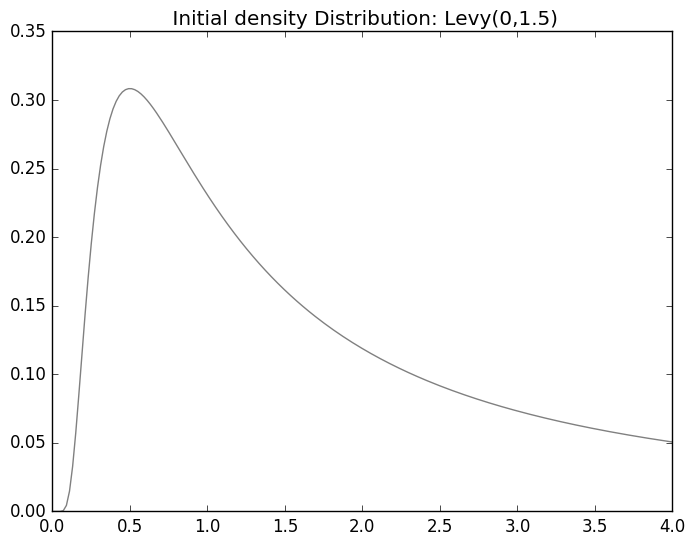

In [26]:
fig, ax = subplots()
#for (x,y) in zip(ygrid, ygrid)
ax[:plot](ygrid, pdf(ψ_0, ygrid), color="0.5")
t=LaTeXString(" Initial density Distribution: Levy(0,1.5)")
ax[:set_title](t)
show()

In [ ]:
linspace(0, 4.0, 50)

LoadError: LoadError: MethodError: `shape` has no method matching shape(::Distributions.FDist)
while loading In[18], in expression starting on line 1